# Feature Engineering
## Einfuehrung
## Exploration
## Transformation
## Konstruktion

In [2]:
## preparation: import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

### Ableiten aus bestehenden

In [4]:
## example 1

## a simulated data example: calculate x and y components of wind direction and speed
np.random.seed(1234)
direction = (np.random.rand(10) * 360).astype(int)
speed = (np.random.rand(10) * 60).astype(int)
data = pd.DataFrame(data={
    'direction': direction, 
    'speed': speed}
)
print(data)

## transform
data['x'] = np.sin(data.direction * np.pi / 180) * data.speed
data['y'] = np.cos(data.direction * np.pi / 180) * data.speed

## check
print(data)

   direction  speed
0         68     21
1        223     30
2        157     41
3        282     42
4        280     22
5         98     33
6         99     30
7        288      0
8        344     46
9        315     52
   direction  speed          x          y
0         68     21  19.470861   7.866738
1        223     30 -20.459951 -21.940611
2        157     41  16.019976 -37.740699
3        282     42 -41.082199   8.732291
4        280     22 -21.665771   3.820260
5         98     33  32.678846  -4.592712
6         99     30  29.630650  -4.693034
7        288      0  -0.000000   0.000000
8        344     46 -12.679318  44.218038
9        315     52 -36.769553  36.769553


In [5]:
## example 2

## read melbourn housing data
datapath = '../3_data'
from os import chdir; chdir(datapath)
data = pd.read_csv('melb_data.csv')

## check before
print(data.Date.head())

## transform to datetime
data['date_dt'] = pd.to_datetime(data.Date, format="%d/%m/%Y")

## extract day, month and year
data['year'] = data.date_dt.dt.year
data['month'] = data.date_dt.dt.month
data['day'] = data.date_dt.dt.day

## calc difference from a start date
start_date = pd.to_datetime('1/1/2016', format="%d/%m/%Y")
data['daydiff'] = (data.date_dt - start_date).dt.days

## check
print(data[['Date', 'date_dt', 'day', 'month', 'year', 'daydiff']].head())

0    3/12/2016
1    4/02/2016
2    4/03/2017
3    4/03/2017
4    4/06/2016
Name: Date, dtype: object
        Date    date_dt  day  month  year  daydiff
0  3/12/2016 2016-12-03    3     12  2016      337
1  4/02/2016 2016-02-04    4      2  2016       34
2  4/03/2017 2017-03-04    4      3  2017      428
3  4/03/2017 2017-03-04    4      3  2017      428
4  4/06/2016 2016-06-04    4      6  2016      155


### Dimensionsreduktion mit PCA

In [7]:
## bank_data with minimal feature engineering

## load data
data = pd.read_csv('bank_data.csv', sep=';')

## make target numerical
data.y = np.where(data.y == 'yes', 1, 0)

## select numerical variables
data = data.select_dtypes(exclude='object')

## drop na
data = data.dropna()

## features - target - split
X = data.drop('y', axis=1)
y = data['y']

## scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().set_output(transform="pandas")
X = scaler.fit_transform(X)

In [8]:
## rotate using PCA
from sklearn.decomposition import PCA ## import trainer class
model = PCA()                         ## instantiate trainer object
pred = model.fit_transform(X)         ## train and apply trainer on data
print(pred[:3, :])                    ## check prediction (result, optional)

[[ 0.82454003 -1.45559011 -1.0976675   0.91524634  0.08531455 -0.15409804
   0.04340854 -0.21781905  0.01493519 -0.01620926]
 [-0.7627286  -0.72786538 -0.32087404 -0.13931963 -0.77314314  0.13132969
   0.59687245 -0.0447055   0.04996993  0.14532455]
 [ 1.01426275 -1.69289619 -1.41943603 -0.31810256 -0.21176908  0.17164499
   0.1649386  -0.17817061 -0.08333184 -0.04625594]]


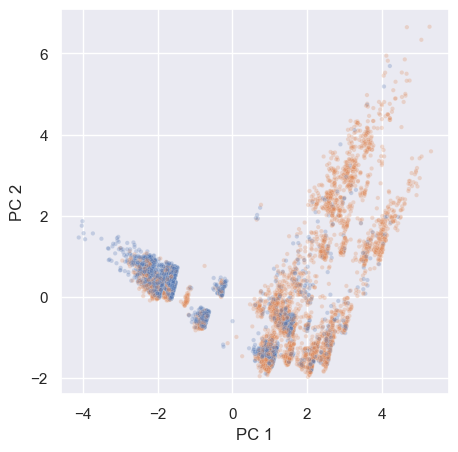

In [9]:
## check
plt.figure(figsize=(5, 5))
ax = sns.scatterplot(x=pred[:, 0], y=pred[:, 1], hue=y, s=10, alpha=0.25, legend=False)
ax.set(xlabel='PC 1', ylabel='PC 2');

   pc  variance    cumvar
0   1  0.382339  0.382339
1   2  0.140965  0.523304
2   3  0.115029  0.638333
3   4  0.100849  0.739182
4   5  0.093686  0.832868
5   6  0.087776  0.920644
6   7  0.047166  0.967810
7   8  0.028729  0.996538
8   9  0.002440  0.998978
9  10  0.001022  1.000000


C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


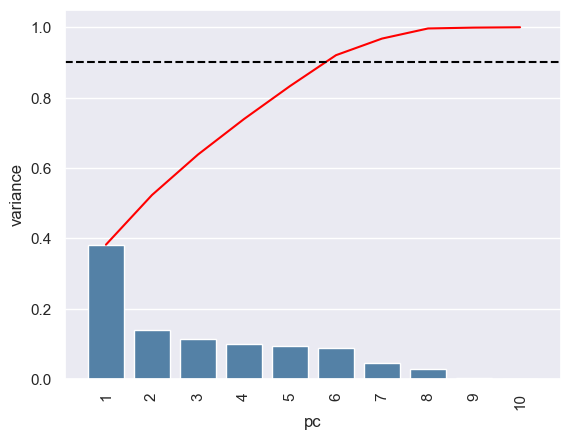

In [10]:
## show distribution of variances

results = pd.DataFrame({
    'pc' : range(1, model.n_components_ + 1),
    'variance': model.explained_variance_ratio_
})
results['cumvar'] = results.variance.cumsum()
print(results.head(10))

## paretplot mit pc1
## pareto plot
sns.barplot(data=results, x='pc', y='variance', color='steelblue')
sns.lineplot(data=results, x=results.pc - 1, y='cumvar', color='red')
plt.axhline(y=0.9, color='black', linestyle='--') 
plt.xticks(rotation=90);

In [11]:
## correlations of principal components
results = pd.DataFrame(pred, columns=['PC ' + str(x) for x in range(1, model.n_components_ + 1)])
results.corr().style.background_gradient(axis=None)

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10
PC 1,1.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
PC 2,-0.000000,1.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000
PC 3,0.000000,-0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000
PC 4,-0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
PC 5,0.000000,-0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
PC 6,0.000000,-0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,-0.000000
PC 7,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000
PC 8,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000
PC 9,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000
PC 10,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,1.000000
